In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ipl_2023_auction.csv')
print(df.shape)
df.sample(5)

(309, 7)


,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
129,Kane Williamson,Batter,New Zealand,200.0,200.0,GT,SOLD
49,G Ajitesh,WK-Batter,India,20.0,NaN,NaN,UNSOLD
288,Jasprit Bumrah,Bowler,India,NaN,1200.0,MI,RETAINED
303,Prithvi Shaw,Batter,India,NaN,750.0,DC,RETAINED
153,Matheesha Pathirana,Bowler,Sri Lanka,NaN,20.0,CSK,RETAINED


In [14]:
df.describe()

,base price (in lacs),final price (in lacs)
count,309.000000,238.000000
mean,39.158576,368.067227
std,46.047732,449.070117
min,20.000000,20.000000
25%,20.000000,21.250000
50%,20.000000,150.000000
75%,20.000000,625.000000
max,200.000000,1850.000000


In [16]:
df.nunique()

name                     309
player style               4
nationality               14
base price (in lacs)       8
final price (in lacs)     67
franchise                 10
status                     3
dtype: int64

In [17]:
df['franchise'].unique()

array(['KKR', nan, 'RR', 'SRH', 'MI', 'LSG', 'DC', 'PBKS', 'CSK', 'RCB',
       'GT'], dtype=object)

In [18]:
df['nationality'].unique()

array(['India', 'South Africa', 'Bangladesh', 'England', 'West Indies',
       'Sri Lanka', 'Afghanistan', 'Australia', 'Namibia', 'Ireland',
       'Netherlands', 'New Zealand', 'Zimbabwe', 'Singapore'],
      dtype=object)

In [4]:
df.isna().sum()

name                       0
player style               0
nationality                0
base price (in lacs)     158
final price (in lacs)     71
franchise                 71
status                     0
dtype: int64

In [5]:
df[df['base price (in lacs)'].isna()]

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
152,Rajat Patidar,Batter,India,NaN,20.0,RCB,RETAINED
153,Matheesha Pathirana,Bowler,Sri Lanka,NaN,20.0,CSK,RETAINED
154,Tristan Stubbs,WK-Batter,South Africa,NaN,20.0,MI,RETAINED
155,Ravi Bishnoi,Bowler,India,NaN,400.0,LSG,RETAINED
...,...,...,...,...,...,...,...
304,MS Dhoni,WK-Batter,India,NaN,1200.0,CSK,RETAINED
305,Moeen Ali,Allrounder,England,NaN,800.0,CSK,RETAINED
306,Ruturaj Gaikwad,Batter,India,NaN,600.0,CSK,RETAINED
307,Rishabh Pant,WK-Batter,India,NaN,1600.0,DC,RETAINED


<Axes: xlabel='base price (in lacs)', ylabel='Count'>

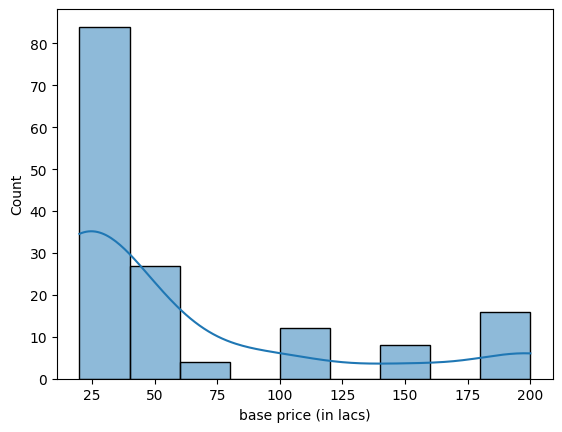

In [6]:
sns.histplot(df['base price (in lacs)'],kde=True)

In [9]:
base_price_mode = df['base price (in lacs)'].mode()[0]
df['base price (in lacs)'].fillna(base_price_mode,inplace=True)
df[df['status']=='RETAINED']

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,20.0,20.0,KKR,RETAINED
152,Rajat Patidar,Batter,India,20.0,20.0,RCB,RETAINED
153,Matheesha Pathirana,Bowler,Sri Lanka,20.0,20.0,CSK,RETAINED
154,Tristan Stubbs,WK-Batter,South Africa,20.0,20.0,MI,RETAINED
155,Ravi Bishnoi,Bowler,India,20.0,400.0,LSG,RETAINED
...,...,...,...,...,...,...,...
304,MS Dhoni,WK-Batter,India,20.0,1200.0,CSK,RETAINED
305,Moeen Ali,Allrounder,England,20.0,800.0,CSK,RETAINED
306,Ruturaj Gaikwad,Batter,India,20.0,600.0,CSK,RETAINED
307,Rishabh Pant,WK-Batter,India,20.0,1600.0,DC,RETAINED


In [42]:
df.isna().sum()

name                      0
player style              0
nationality               0
base price (in lacs)      0
final price (in lacs)    71
franchise                71
status                    0
dtype: int64

In [43]:
df_sold=df[df['status']=="SOLD"]
df_sold.head()

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD
5,Abdul Basith,Allrounder,India,20.0,20.0,RR,SOLD
7,Akeal Hosein,Bowler,West Indies,100.0,100.0,SRH,SOLD
8,Raghav Goyal,Bowler,India,20.0,20.0,MI,SOLD


In [44]:
nationality_wise_players=df_sold['nationality'].value_counts()
nationality_wise_players

nationality
India           51
England          8
West Indies      5
Australia        4
South Africa     4
Bangladesh       2
New Zealand      2
Afghanistan      1
Namibia          1
Ireland          1
Zimbabwe         1
Name: count, dtype: int64

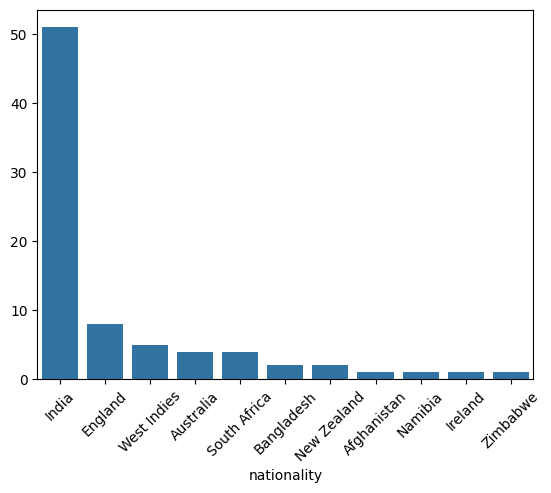

In [45]:
sns.barplot(x=nationality_wise_players.index,y=nationality_wise_players.values)
plt.xticks(rotation=45)
plt.show()

as we can see most of the sold players are from india and england

In [46]:
df_sold['player style'].unique()

array(['Allrounder', 'Batter', 'Bowler', 'WK-Batter'], dtype=object)

In [47]:
player_style=df_sold['player style'].value_counts()
player_style

player style
Allrounder    32
Bowler        25
Batter        12
WK-Batter     11
Name: count, dtype: int64

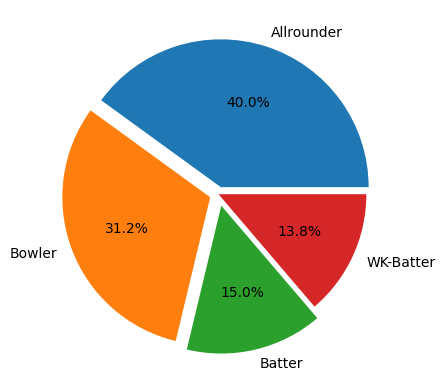

In [85]:
plt.pie(x=player_style.values,labels=player_style.index,autopct='%0.1f%%',explode=[0.05,0.06,0.08,0])
plt.show()

as we can see all rounders are sold more in 2023 ipl auction, next are bowlers and wk-batter are sold the least

In [49]:
df_sold.head()

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD
5,Abdul Basith,Allrounder,India,20.0,20.0,RR,SOLD
7,Akeal Hosein,Bowler,West Indies,100.0,100.0,SRH,SOLD
8,Raghav Goyal,Bowler,India,20.0,20.0,MI,SOLD


In [53]:
franchise_sold_players=df_sold.franchise.value_counts()
franchise_sold_players

franchise
SRH     13
LSG     10
RR       9
KKR      8
MI       8
CSK      7
RCB      7
GT       7
PBKS     6
DC       5
Name: count, dtype: int64

<Axes: xlabel='franchise'>

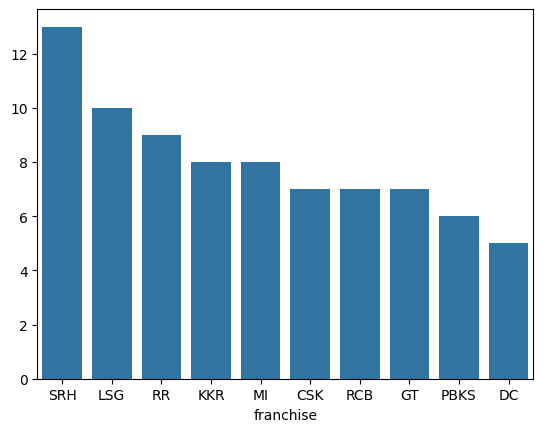

In [55]:
sns.barplot(x=franchise_sold_players.index,y=franchise_sold_players.values)

In [58]:
df_sold.shape

(80, 7)

<Axes: xlabel='final price (in lacs)', ylabel='Count'>

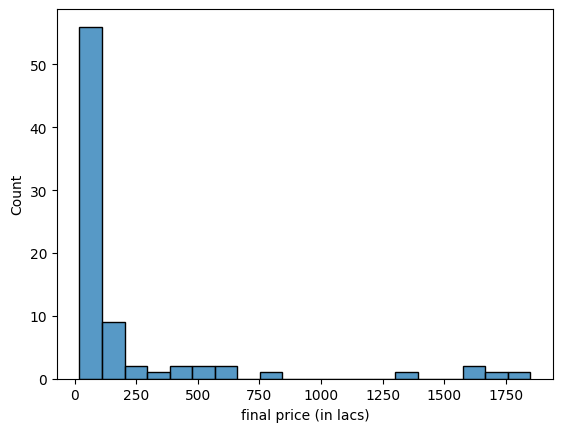

In [66]:
sns.histplot(df_sold['final price (in lacs)'],bins=20)

In [69]:
df_sold.apply(np.max)

name                     Yudhvir Singh Charak
player style                        WK-Batter
nationality                          Zimbabwe
base price (in lacs)                    200.0
final price (in lacs)                  1850.0
franchise                                 SRH
status                                   SOLD
dtype: object

In [70]:
df_sold.head()

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD
5,Abdul Basith,Allrounder,India,20.0,20.0,RR,SOLD
7,Akeal Hosein,Bowler,West Indies,100.0,100.0,SRH,SOLD
8,Raghav Goyal,Bowler,India,20.0,20.0,MI,SOLD
